In [ ]:
import os
import tensorflow as tf
import numpy as np #adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import pandas as pd #data structures and operations for manipulating numerical tables and time series
import sys # system path io
import glob #glob module is used to retrieve files/pathnames matching a specified pattern
from tqdm import tqdm # show progress bar when a loop is running
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly import tools
from plotly.graph_objs import *
from plotly.graph_objs.layout import Margin, YAxis, XAxis
init_notebook_mode()
import matplotlib.pyplot as plt
from matplotlib import patches as patches
from pathlib import Path
import xml.etree.ElementTree as ET
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import backend as K
import io
from google.colab import drive
from sklearn.model_selection import KFold, StratifiedKFold,LeaveOneOut
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import backend as K
from keras.callbacks import EarlyStopping
import shutil
import statistics
from keras.models import Model
from tensorflow.keras import layers
drive.mount('/content/gdrive')


In [ ]:
!ls /content/gdrive/MyDrive/Alldata/BG  | wc -l
!ls /content/gdrive/MyDrive/Alldata/reticulocyte  | wc -l
!ls /content/gdrive/MyDrive/Alldata/erythrocyte  | wc -l
'''
479
475
1507
'''

479
475
1507


'\n479\n470\n1507\n'

In [ ]:
#First need to trai on the feline reticulocyte
IMAGE_SIZE=[100,100]
res = VGG16(input_shape=IMAGE_SIZE + [3], weights=None, include_top=False)  # do not include head, transfer learning
for layer in res.layers:
    layer.trainable = True
# layers creation - Here more can be added
x = layers.Flatten()(res.output)
x = layers.Dense(1000, activation='relu')(x)
#x = layers.Dropout(0.6)(x)    
prediction = layers.Dense(2, activation='softmax')(x)
# creating a model object
model = Model(inputs=res.input, outputs=prediction)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(

  loss='categorical_crossentropy',

  optimizer='sgd',

  metrics=['accuracy'] 

)
batch_size=32
felinetrain_path= '/content/gdrive/MyDrive/felineAlldata'
felinevalidation_path= '/content/gdrive/MyDrive/felineAlldata'
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=.001,patience=10,mode='auto')
felinetrain_datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True,   vertical_flip=True,  preprocessing_function=preprocess_input)

felinevalidation_datagen = ImageDataGenerator( preprocessing_function=preprocess_input)
#Start ImageClassification Model
felinetrain_generator = felinetrain_datagen.flow_from_directory(
            felinetrain_path,
            shuffle= True,
            target_size=IMAGE_SIZE,
            batch_size=32)
felinevalidation_generator = felinevalidation_datagen.flow_from_directory(
            felinevalidation_path,
            target_size=IMAGE_SIZE,
            batch_size=32,
            shuffle=False)  
       
#history=
model.fit(felinetrain_generator, 
                        epochs=100,                       
                        validation_data = felinevalidation_generator,
                        steps_per_epoch=int(2942 // batch_size),
                        validation_steps=int(2942 // batch_size),
                        callbacks=[callback])
                        

Found 2942 images belonging to 2 classes.
Found 2942 images belonging to 2 classes.
Epoch 1/100
91/91 [==============================] - 21s 198ms/step - loss: 0.6447 - accuracy: 0.6722 - val_loss: 0.5840 - val_accuracy: 0.7225
Epoch 2/100
91/91 [==============================] - 16s 179ms/step - loss: 0.6011 - accuracy: 0.7096 - val_loss: 0.5463 - val_accuracy: 0.7527
Epoch 3/100
91/91 [==============================] - 16s 181ms/step - loss: 0.5590 - accuracy: 0.7364 - val_loss: 0.5298 - val_accuracy: 0.7579
Epoch 4/100
91/91 [==============================] - 16s 179ms/step - loss: 0.5303 - accuracy: 0.7504 - val_loss: 0.5223 - val_accuracy: 0.7514
Epoch 5/100
91/91 [==============================] - 16s 181ms/step - loss: 0.5054 - accuracy: 0.7717 - val_loss: 0.4507 - val_accuracy: 0.8163
Epoch 6/100
91/91 [==============================] - 16s 181ms/step - loss: 0.4525 - accuracy: 0.8109 - val_loss: 0.4207 - val_accuracy: 0.8197
Epoch 7/100
91/91 [==============================] -

In [ ]:
model.save('Felinepretraiedweights.h5')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
predictions = model.predict(felinevalidation_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = felinevalidation_generator.classes
# evaluate validation performance
#print("***Performance on Validation data***")
print(yPredictions)
accuracy= accuracy_score(true_classes, yPredictions)
f1=f1_score(true_classes, yPredictions,average='macro')
Microf1=f1_score(true_classes, yPredictions,average='micro')
Macroprecision =precision_score(true_classes, yPredictions,average='macro')
Microprecision =precision_score(true_classes, yPredictions,average='micro')
print('acc' ,accuracy)
print('Macro f1' ,f1)
print('Micro f1' ,f1)
print('Macro precision',Macroprecision)
print('Micro precision',Microprecision)
CM= confusion_matrix(true_classes, yPredictions)
print(CM)

92/92 [==============================] - 5s 52ms/step
[0 0 0 ... 1 1 1]
acc 0.978585995921142
Macro f1 0.9756012059727852
Micro f1 0.9756012059727852
Macro precision 0.9765111576419521
Micro precision 0.978585995921142
[[1954   28]
 [  35  925]]


In [ ]:
#print(len(model.layers))
index=1

for layer in model.layers:
  if index <= 19:
     layer.trainable = False
  
  index=index+1
print(len(model.layers))

22


In [ ]:
########## SAVE THE FELINE EASIER FOR NEXT TIME?
!mkdir validation
!mkdir validation/reticulocyte
!mkdir validation/erythrocyte
!mkdir validation/BG

In [ ]:
import PIL
X=[]
Y=[]
base_dir="/content/gdrive/MyDrive/Alldata"
labels_list=['erythrocyte','reticulocyte','BG']#retic_df["class"].unique().tolist()
dir=os.getcwd()
for directory in labels_list:
    print(directory)
    #print(len(os.listdir(base_dir+'/'+directory)))
    for files in os.listdir(base_dir+'/'+directory):
        #img = Image.open(directory+'/'+files)
        #img = img.convert('L')
        #img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        X.append(directory+'/'+files)
        #X.append([np.array(img)])
        current_index=labels_list.index(directory)
        Y.append(current_index)
X=np.asarray(X)
Y=np.asarray(Y)

erythrocyte
reticulocyte
BG


In [ ]:
NN= Model(inputs=model.input, outputs=model.layers[-4].output)

x1 = layers.Flatten()(NN.output)
x1 = layers.Dense(1000, activation='relu')(x1)#kernel_initializer=tf.keras.initializers.glorot_uniform(seed=66)
  
x1 = layers.Dense(3, activation='softmax')(x1)
# creating a model object
NN = Model( NN.input, x1) 
print(len(NN.layers))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=.9, nesterov=True)

NN.compile(
 loss='categorical_crossentropy',

  optimizer=sgd,

  metrics=['accuracy'] 

)
NN.summary()

22
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       

In [ ]:
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []

validation_path="validation"
train_path= '/content/gdrive/MyDrive/Alldata/'
#skf = StratifiedKFold(n_splits=2, shuffle=True)
#skf.get_n_splits(X, Y)
accuracy_list= list()
precision_list=list()
f1_list=list()
microprecision_list=list()
microf1_list=list()
means, mins, maxs = list(),list(),list()
f1means, f1mins, f1maxs = list(),list(),list()
microf1means, microf1mins, microf1maxs = list(),list(),list()
precmeans, precmins, precmaxs = list(),list(),list()
microprecmeans, microprecmins, microprecmaxs = list(),list(),list()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6,min_delta=.001,mode='auto')
foldNum=0
k=5
skf = StratifiedKFold(n_splits=k, shuffle=True)

for train_index, val_index in skf.split(X, Y):
             
       foldNum+=1
       NN.compile(loss='categorical_crossentropy', optimizer='sgd',  metrics=['accuracy'] )
       print("Results for fold",foldNum)
       X_train, X_val = X[train_index], X[val_index]
       Y_train, Y_val = Y[train_index], Y[val_index]
       for eachindex in range(len(X_val)):
           shutil.move('/content/gdrive/MyDrive/Alldata/'+X_val[eachindex], 
                    'validation/'+X_val[eachindex])
       
       #Start ImageClassification Model
       train_datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True,   vertical_flip=True,  preprocessing_function=preprocess_input)

       validation_datagen = ImageDataGenerator( preprocessing_function=preprocess_input)
       train_generator = train_datagen.flow_from_directory(
            train_path,
            shuffle= True,
            target_size=IMAGE_SIZE,
            batch_size=32,
            subset='training')
       validation_generator = validation_datagen.flow_from_directory(
            validation_path,
            target_size=IMAGE_SIZE,
            batch_size=32,
            shuffle=False)  
       
       #history=
       NN.fit(train_generator, 
                        epochs=130,
                        validation_data = validation_generator,
                        steps_per_epoch=int(len(X_train) // batch_size),
                        validation_steps=int(len(X_val) // batch_size),
                        callbacks=[callback])
       predictions = NN.predict(validation_generator, verbose=1)
       #score = model.evaluate(validation_generator,batch_size =32)
       #print('eval', score)
       yPredictions = np.argmax(predictions, axis=1)
       true_classes = validation_generator.classes
       # evaluate validation performance
       #print("***Performance on Validation data***")
       accuracy=accuracy_score(true_classes, yPredictions)
       f1=f1_score(true_classes, yPredictions,average='macro')
       microf1= f1_score(true_classes, yPredictions,average='micro')
       precision= precision_score(true_classes, yPredictions,average='macro')
       microprecision= precision_score(true_classes, yPredictions,average='micro')
       #precision=precision_score(true_classes, yPredictions,average='weighted')
       #f1Score=f1_score(true_classes, yPredictions, average='weighted') 
       #print("Accuracy  : {}".format(accuracy))
       #print("Precision : {}".format(precision))
       #print("f1Score : {}".format(f1Score))
       #cm=confusion_matrix(true_classes, yPredictions)
       accuracy_list.append(accuracy)
       f1_list.append(f1)
       precision_list.append(precision)
       microf1_list.append(microf1)
       microprecision_list.append(microprecision)
       #print(cm)
       #valAcc, valPrec, valFScore = my_metrics(true_classes, yPredictions)
       for returnindex in range(len(X_val)):
            shutil.move('validation/'+X_val[returnindex],'/content/gdrive/MyDrive/Alldata/'+X_val[returnindex])
#gotta change this to F1
k_mean=statistics.mean(accuracy_list)
k_max=max(accuracy_list)
k_min=min(accuracy_list)
means.append(k_mean)
mins.append(k_mean - k_min)
maxs.append(k_max - k_mean)
#==================
f1_mean=statistics.mean(f1_list)
f1_max=max(f1_list)
f1_min=min(f1_list)
f1means.append(f1_mean)
f1mins.append(f1_mean - f1_min)
f1maxs.append(f1_max - f1_mean)
#========================
prec_mean=statistics.mean(precision_list)
prec_max=max(precision_list)
prec_min=min(precision_list)
precmeans.append(prec_mean)
precmins.append(prec_mean - prec_min)
precmaxs.append(prec_max - prec_mean)
#==========================
microprec_mean=statistics.mean(microprecision_list)
microprec_max=max(microprecision_list)
microprec_min=min(microprecision_list)
microprecmeans.append(microprec_mean)
microprecmins.append(microprec_mean - microprec_min)
microprecmaxs.append(microprec_max - microprec_mean)
#===========================
microf1_mean=statistics.mean(microf1_list)
microf1_max=max(microf1_list)
microf1_min=min(microf1_list)
microf1means.append(microf1_mean)
microf1mins.append(microf1_mean - microf1_min)
microf1maxs.append(microf1_max - microf1_mean)
#=============================
print('Image_size and batch_size')
print(IMAGE_SIZE,batch_size)
print('Minimum Accuracy')
print(mins)
print('Maximum Accuracy')
print(maxs)
print('Average Accuracy')
print(means)
#=============
print('Minimum macro precision')
print(precmins)
print('Maximum macro precision')
print(precmaxs)
print('Average macro precision')
print(precmeans)
#===============
print('Minimum macro F1')
print(f1mins)
print('Maximum macro F1')
print(f1maxs)
print('Average macro F1')
print(f1means)
#===============
print('Minimum micro precision')
print(microprecmins)
print('Maximum micro precision')
print(microprecmaxs)
print('Average micro precision')
print(microprecmeans)
#===============
print('Minimum micro F1')
print(microf1mins)
print('Maximum micro F1')
print(microf1maxs)
print('Average micro F1')
print(microf1means)

Results for fold 1
Found 1968 images belonging to 3 classes.
Found 493 images belonging to 3 classes.
Epoch 1/130
61/61 [==============================] - 15s 241ms/step - loss: 0.0682 - accuracy: 0.9781 - val_loss: 0.0644 - val_accuracy: 0.9833
Epoch 2/130
61/61 [==============================] - 14s 238ms/step - loss: 0.0591 - accuracy: 0.9854 - val_loss: 0.0723 - val_accuracy: 0.9854
Epoch 3/130
61/61 [==============================] - 14s 238ms/step - loss: 0.0603 - accuracy: 0.9873 - val_loss: 0.0783 - val_accuracy: 0.9812
Epoch 4/130
61/61 [==============================] - 15s 237ms/step - loss: 0.0643 - accuracy: 0.9843 - val_loss: 0.0584 - val_accuracy: 0.9854
Epoch 5/130
61/61 [==============================] - 14s 236ms/step - loss: 0.0453 - accuracy: 0.9915 - val_loss: 0.0540 - val_accuracy: 0.9896
Epoch 6/130
61/61 [==============================] - 15s 239ms/step - loss: 0.0598 - accuracy: 0.9790 - val_loss: 0.0541 - val_accuracy: 0.9937
Epoch 7/130
61/61 [===============

In [ ]:
####retrain on the entire dataset


entire_datasetNN =Model(inputs=model.input, outputs=model.layers[-4].output) # remember that the model chunk is not trainable so its like a constant here
for layer in entire_datasetNN.layers:
    layer.trainable = False
# layers creation - Here more can be added
xlayers = layers.Flatten()(entire_datasetNN.output)
xlayers = layers.Dense(1000, activation='relu')(xlayers)
Alldataprediction = layers.Dense(3, activation='softmax')(xlayers)
# creating a model object

alldatamodel = Model(inputs=entire_datasetNN.input, outputs=Alldataprediction)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
alldatamodel.compile(
  loss='categorical_crossentropy',

  optimizer='sgd',

  metrics=['accuracy'] 

)


In [ ]:
Alldatatrain_path= '/content/gdrive/MyDrive/Alldata'
Alldatavalidation_path= '/content/gdrive/MyDrive/Alldata'
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=.001,patience=6,mode='auto')
alldatatrain_datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True,   vertical_flip=True,  preprocessing_function=preprocess_input)
#,  width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.4,1.5],zoom_range=0.3
#
alldatavalidation_datagen = ImageDataGenerator( preprocessing_function=preprocess_input)
#Start ImageClassification Model
alldatatrain_generator = alldatatrain_datagen.flow_from_directory(
            Alldatatrain_path,
            shuffle= True,
            target_size=IMAGE_SIZE,
            batch_size=32)
alldatavalidation_generator = alldatavalidation_datagen.flow_from_directory(
            Alldatavalidation_path,
            target_size=IMAGE_SIZE,
            batch_size=32,
            shuffle=False)  
       
history=alldatamodel.fit(alldatatrain_generator, 
                        epochs=130,                       
                        validation_data = alldatavalidation_generator,
                        steps_per_epoch=int(2461 // batch_size),
                        validation_steps=int(2461 // batch_size),    
                        callbacks=[callback])

Found 2461 images belonging to 3 classes.
Found 2461 images belonging to 3 classes.
Epoch 1/130
76/76 [==============================] - 28s 358ms/step - loss: 0.7306 - accuracy: 0.7133 - val_loss: 0.4262 - val_accuracy: 0.8688
Epoch 2/130
76/76 [==============================] - 27s 351ms/step - loss: 0.4474 - accuracy: 0.8518 - val_loss: 0.3341 - val_accuracy: 0.9017
Epoch 3/130
76/76 [==============================] - 27s 351ms/step - loss: 0.3288 - accuracy: 0.8902 - val_loss: 0.3062 - val_accuracy: 0.9116
Epoch 4/130
76/76 [==============================] - 27s 353ms/step - loss: 0.3114 - accuracy: 0.9039 - val_loss: 0.2508 - val_accuracy: 0.9285
Epoch 5/130
76/76 [==============================] - 27s 350ms/step - loss: 0.2634 - accuracy: 0.9178 - val_loss: 0.2300 - val_accuracy: 0.9264
Epoch 6/130
76/76 [==============================] - 26s 349ms/step - loss: 0.2296 - accuracy: 0.9274 - val_loss: 0.2198 - val_accuracy: 0.9276
Epoch 7/130
76/76 [==============================] -

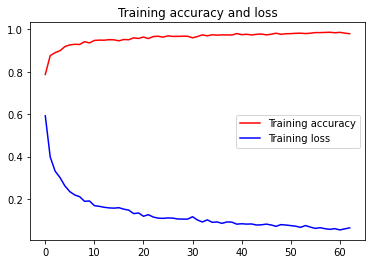

<Figure size 432x288 with 0 Axes>

In [ ]:
###save the model 
###plot the graphs

entire_datasetNN.save('felineFreezingAlldata.h5')
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training accuracy and loss')
plt.legend(loc=0)
plt.figure()


plt.show()

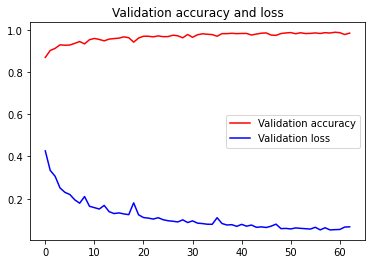

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Validation accuracy and loss')
plt.legend(loc=0)
plt.figure()


plt.show()

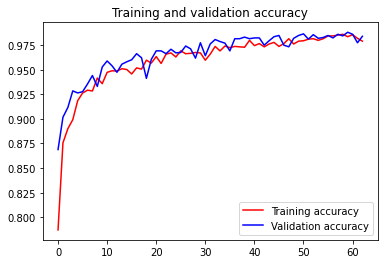

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

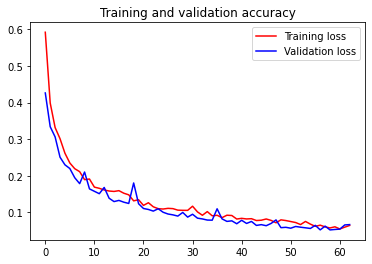

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
###get all the metrics 
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
alldatapredictions = alldatamodel.predict(alldatavalidation_generator, verbose=1)
alldatayPredictions = np.argmax(alldatapredictions, axis=1)
alldatatrue_classes = alldatavalidation_generator.classes

77/77 [==============================] - 11s 137ms/step


In [ ]:
alldataaccuracy= accuracy_score(alldatatrue_classes, alldatayPredictions)
Macroalldataf1=f1_score(alldatatrue_classes, alldatayPredictions,average='macro')
Microalldataf1=f1_score(alldatatrue_classes, alldatayPredictions,average='micro')
Macroalldataprecision=precision_score(alldatatrue_classes, alldatayPredictions,average='macro')
Microalldataprecision=precision_score(alldatatrue_classes, alldatayPredictions,average='micro')
print('Accuracy' ,alldataaccuracy)
print('Macro f1' ,Macroalldataf1)
print('Micro f1' ,Microalldataf1)
print('Macro precision' ,Macroalldataprecision)
print('Micro precision' ,Microalldataprecision)
alldataCM= confusion_matrix(alldatatrue_classes, alldatayPredictions)
print(alldataCM)

Accuracy 0.9841527834213735
Macro f1 0.9809262283882343
Micro f1 0.9841527834213735
Macro precision 0.9786557901418328
Micro precision 0.9841527834213735
[[ 472    3    4]
 [   9 1485   13]
 [   1    9  465]]
